In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
datos = pd.read_csv('us_perm_visas.csv',low_memory=False)

# Descripción del conjunto de datos

Número y tipo de características (binarias, discretas, continuas, etc.)

In [3]:
# Número de atributos o características
len(datos.columns)

154

In [4]:
# Tipos de datos existentes en las características
datos.dtypes.value_counts()

object     144
float64     10
dtype: int64

In [5]:
# descripcion de las caracterísiticas. Si el dataframe tiene diferentes tipos de datos, 
# sólo se consideran los datos numéricos 
datos.describe()

employer_num_employees  employer_yr_estab  \
count            2.390130e+05      238958.000000   
mean             2.309387e+04        1984.208267   
std              5.453129e+05          38.470555   
min              0.000000e+00           0.000000   
25%              7.300000e+01        1980.000000   
50%              1.200000e+03        1996.000000   
75%              1.613400e+04        2004.000000   
max              2.635506e+08        2016.000000   

       foreign_worker_yr_rel_edu_completed  fw_info_yr_rel_edu_completed  \
count                         83364.000000                 137198.000000   
mean                           2001.345761                   2002.633603   
std                              91.444715                     89.674423   
min                               0.000000                      0.000000   
25%                            2003.000000                   2004.000000   
50%                            2006.000000                   2007.000000   
75%                            2010.000000                   2011.000000   
max                            2103.000000                   2207.000000   

       job_info_alt_cmb_ed_oth_yrs  job_info_alt_occ_num_months  \
count                 70220.000000                147200.000000   
mean                      4.593876                    36.483118   
std                       4.838582                    23.391668   
min                       0.000000                     0.000000   
25%                       3.000000                    24.000000   
50%                       5.000000                    24.000000   
75%                       5.000000                    60.000000   
max                      96.000000                   240.000000   

       job_info_experience_num_months  job_info_training_num_months  \
count                   133188.000000                   4779.000000   
mean                        33.103560                     32.685081   
std                         22.733393                     20.593288   
min                          0.000000                      0.000000   
25%                         12.000000                     12.000000   
50%                         24.000000                     36.000000   
75%                         60.000000                     36.000000   
max                        244.000000                    240.000000   

       wage_offered_from_9089  wage_offered_to_9089  
count            1.146470e+05          3.101500e+04  
mean             9.588846e+04          1.232273e+05  
std              1.463822e+05          1.080289e+05  
min              6.700000e+00          0.000000e+00  
25%              7.453400e+04          9.700100e+04  
50%              9.064400e+04          1.206000e+05  
75%              1.100000e+05          1.448419e+05  
max              1.629060e+07          1.328500e+07

In [119]:
# descripción de los datos no numéricos 
resultadobin = datos.describe(include=[np.object])

# Se hace una transpuesta de la descripción obtenida. 
# De la descripción sólo se toma las dos primeras filas 
# para toda la data obtenida
transpuesta = resultadobin[:2].T

# Para obtener las características binarias. 
# Se filtran aquellas características con sólo dos posibles valores. 
columnasbinarias = transpuesta[transpuesta.unique==2]
columnasbinarias

count unique
foreign_worker_ownership_interest    88638      2
fw_ownership_interest               150445      2
ji_foreign_worker_live_on_premises   88637      2
ji_fw_live_on_premises              150446      2
ji_live_in_domestic_service         239080      2
ji_offered_to_sec_j_foreign_worker   88637      2
ji_offered_to_sec_j_fw              150446      2
job_info_alt_combo_ed_exp           239058      2
job_info_alt_field                  239059      2
job_info_combo_occupation           239083      2
job_info_experience                 239081      2
job_info_foreign_ed                 238862      2
job_info_foreign_lang_req           239076      2
job_info_job_req_normal             239079      2
job_info_training                   239078      2
preparer_info_emp_completed         239054      2
recr_info_coll_teach_comp_proc        7021      2
recr_info_coll_univ_teacher         239062      2
recr_info_employer_rec_payment      239073      2
recr_info_professional_occ          239076      2
recr_info_sunday_newspaper          233022      2
refile                              118079      2
ri_2nd_ad_newspaper_or_journal      232914      2
ri_coll_tch_basic_process             7013      2
ri_layoff_in_past_six_months        239059      2

In [7]:
# Para ver cuales son los valores únicos que hay en una determinada columna
pd.unique(datos['case_status'])

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [8]:
# Seleccionar los datos, excluyendo aquellos de un determinado tipo
datos.select_dtypes(exclude=["number"])

add_these_pw_job_title_9089       agent_city  \
0                              NaN              NaN   
1                              NaN              NaN   
2                              NaN              NaN   
3                              NaN              NaN   
4                              NaN              NaN   
5                              NaN              NaN   
6                              NaN              NaN   
7                              NaN              NaN   
8                              NaN              NaN   
9                              NaN              NaN   
10                             NaN              NaN   
11                             NaN              NaN   
12                             NaN              NaN   
13                             NaN              NaN   
14                             NaN              NaN   
15                             NaN              NaN   
16                             NaN              NaN   
17                             NaN              NaN   
18                             NaN              NaN   
19                             NaN              NaN   
20                             NaN              NaN   
21                             NaN              NaN   
22                             NaN              NaN   
23                             NaN              NaN   
24                             NaN              NaN   
25                             NaN              NaN   
26                             NaN              NaN   
27                             NaN              NaN   
28                             NaN              NaN   
29                             NaN              NaN   
...                            ...              ...   
374332                         NaN          Addison   
374333                         NaN    San Francisco   
374334                         NaN        Rockville   
374335                         NaN         New York   
374336                         NaN          Waltham   
374337                         NaN       Boca Raton   
374338                         NaN          Atlanta   
374339                         NaN        Arlington   
374340                         NaN           Austin   
374341                         NaN     Coral Gables   
374342                         NaN          Matawan   
374343                         NaN     REISTERSTOWN   
374344                         NaN  Calabasas Hills   
374345                         NaN      Santa Clara   
374346                         NaN      Santa Clara   
374347                         NaN         New York   
374348                         NaN              NaN   
374349                         NaN       Cincinnati   
374350                         NaN          Addison   
374351                         NaN      Santa Clara   
374352                         NaN         New York   
374353                         NaN           Edison   
374354                         NaN     Jacksonville   
374355                         NaN      LOS ANGELES   
374356                         NaN    San Francisco   
374357                         NaN       Buena Park   
374358                         NaN          Seattle   
374359                         NaN       Schaumburg   
374360                         NaN      LOS ANGELES   
374361                         NaN          Phoenix   

                                          agent_firm_name agent_state  \
0                                                     NaN         NaN   
1                                                     NaN         NaN   
2                                                     NaN         NaN   
3                                                     NaN         NaN   
4                                                     NaN         NaN   
5                                                     NaN         NaN   
6                                                     NaN         NaN   
7           

## Número de muestras

Se va definir el número de muestras para el conjunto de entrenamiento y pruebas

In [6]:
X = datos.loc[:, datos.columns != 'case_status']

y = datos.case_status

In [81]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
print ('Número de muestras para el conjunto de entrenamiento', len(X_train))
print ('Número de muestras para el conjunto de pruebas', len(X_test))

Número de muestras para el conjunto de entrenamiento 280771
Número de muestras para el conjunto de pruebas 93591


In [94]:
print ('Número de muestras por clase')
print ('----------------------------')
y_train.value_counts()

Número de muestras por clase
----------------------------


Certified            136613
Certified-Expired    111380
Denied                19133
Withdrawn             13645
Name: case_status, dtype: int64

## Estadística descriptiva y visualización de datos



In [98]:
# Tipos de datos existentes en las características
X_train.dtypes.value_counts()

object     143
float64     10
dtype: int64

In [96]:
# Descripción de las características con datos de tipo numérico

X_train.describe()

employer_num_employees  employer_yr_estab  \
count            1.793640e+05      179324.000000   
mean             2.357427e+04        1984.185731   
std              6.280409e+05          38.484301   
min              0.000000e+00           5.000000   
25%              7.300000e+01        1980.000000   
50%              1.200000e+03        1996.000000   
75%              1.625600e+04        2004.000000   
max              2.635506e+08        2016.000000   

       foreign_worker_yr_rel_edu_completed  fw_info_yr_rel_edu_completed  \
count                         62631.000000                 102912.000000   
mean                           2001.265635                   2002.653869   
std                              92.276635                     89.376612   
min                               0.000000                      0.000000   
25%                            2003.000000                   2004.000000   
50%                            2006.000000                   2007.000000   
75%                            2010.000000                   2011.000000   
max                            2029.000000                   2207.000000   

       job_info_alt_cmb_ed_oth_yrs  job_info_alt_occ_num_months  \
count                 52584.000000                110426.000000   
mean                      4.601019                    36.461114   
std                       4.916559                    23.400245   
min                       0.000000                     0.000000   
25%                       3.000000                    24.000000   
50%                       5.000000                    24.000000   
75%                       5.000000                    60.000000   
max                      96.000000                   240.000000   

       job_info_experience_num_months  job_info_training_num_months  \
count                   100108.000000                   3620.000000   
mean                        33.070704                     32.702486   
std                         22.725956                     20.622574   
min                          0.000000                      0.000000   
25%                         12.000000                     12.000000   
50%                         24.000000                     36.000000   
75%                         60.000000                     36.000000   
max                        240.000000                    240.000000   

       wage_offered_from_9089  wage_offered_to_9089  
count            8.598000e+04          2.326500e+04  
mean             9.605693e+04          1.233595e+05  
std              1.520567e+05          1.208429e+05  
min              6.700000e+00          0.000000e+00  
25%              7.450000e+04          9.700000e+04  
50%              9.050000e+04          1.205000e+05  
75%              1.100000e+05          1.447640e+05  
max              1.629060e+07          1.328500e+07

In [97]:
# Descripción de las características con datos de tipo Object

X_train.describe(include=[np.object])

add_these_pw_job_title_9089 agent_city  \
count                               31744     158643   
unique                               3553       1677   
top     Software Developers, Applications   New York   
freq                                 7570      14520   

                                agent_firm_name agent_state application_type  \
count                                    155305      156244           101349   
unique                                     8950         107                3   
top     Fragomen, Del Rey, Bernsen & Loewy, LLP          CA           ONLINE   
freq                                      22217       26447            84398   

              case_no    case_number case_received_date class_of_admission  \
count          101349         179422             179421             263597   
unique         101205         179057               2056                 56   
top     A-12219-88590  A-15216-05252         2014-06-30               H-1B   
freq                2              2                588             212361   

       country_of_citizenship              ...               \
count                  265396              ...                
unique                    197              ...                
top                     INDIA              ...                
freq                   146173              ...                

       ri_posted_notice_at_worksite ri_pvt_employment_firm_from  \
count                        179351                       12365   
unique                            3                         939   
top                               Y                  2013-07-23   
freq                         176509                        1860   

       ri_pvt_employment_firm_to ri_us_workers_considered schd_a_sheepherder  \
count                      12364                    12945             179408   
unique                      1087                        3                  1   
top                   2013-07-30                        A                  N   
freq                        1859                     6709             179408   

       us_economic_sector wage_offer_from_9089 wage_offer_to_9089  \
count               96709               194695              55299   
unique                 17                32085              11389   
top                    IT            72,467.00           160000.0   
freq                39508                 2072               1149   

       wage_offer_unit_of_pay_9089 wage_offered_unit_of_pay_9089  
count                       193855                         52932  
unique                          10                             4  
top                           Year                          Year  
freq                        173105                         51648  

[4 rows x 143 columns]

In [99]:
# Visualizar los primeros datos de entrenamiento
X_train.head()

add_these_pw_job_title_9089 agent_city  \
170040                         NaN  San Diego   
64117          Purchasing Managers        NaN   
288703                         NaN   MELVILLE   
131907                         NaN        NaN   
235641                         NaN   Flushing   

                          agent_firm_name agent_state application_type  \
170040            Larrabee Albi Coker LLP  CALIFORNIA              NaN   
64117                                 NaN         NaN           ONLINE   
288703          GUTTIKONDA LAW FIRM, PLLC          NY              NaN   
131907                                NaN         NaN           ONLINE   
235641  Law Office of Yong Il Jeong, P.C.          NY              NaN   

              case_no    case_number case_received_date class_of_admission  \
170040            NaN  A-14143-72081         2014-06-06               H-1B   
64117   A-13220-86699            NaN                NaN               H-1B   
288703            NaN  A-15321-40326         2015-11-18                F-1   
131907  A-13077-48932            NaN                NaN               H-1B   
235641            NaN  A-15099-65362         2015-05-01                E-2   

       country_of_citizenship              ...               \
170040                 CANADA              ...                
64117                 GERMANY              ...                
288703                  INDIA              ...                
131907                  INDIA              ...                
235641            SOUTH KOREA              ...                

       ri_pvt_employment_firm_to ri_us_workers_considered schd_a_sheepherder  \
170040                       NaN                      NaN                  N   
64117                        NaN                      NaN                NaN   
288703                       NaN                      NaN                  N   
131907                       NaN                      NaN                NaN   
235641                       NaN                      NaN                  N   

       us_economic_sector wage_offer_from_9089 wage_offer_to_9089  \
170040                NaN           134,534.00                NaN   
64117              Retail                  NaN                NaN   
288703                NaN              86195.0                NaN   
131907       Advanced Mfg                  NaN                NaN   
235641                NaN              34050.0                NaN   

       wage_offer_unit_of_pay_9089 wage_offered_from_9089  \
170040                        Year                    NaN   
64117                          NaN               112528.0   
288703                        Year                    NaN   
131907                         NaN               101000.0   
235641                        Year                    NaN   

        wage_offered_to_9089 wage_offered_unit_of_pay_9089  
170040                   NaN                           NaN  
64117               160000.0                           NaN  
288703                   NaN                           NaN  
131907              138700.0                          Year  
235641                   NaN                           NaN  

[5 rows x 153 columns]

In [126]:
# funcion para crear un gráfico
def crearGrafico(data): 
    dataDiccionario = {}
    
    for value in data.dropna():
        if value in dataDiccionario:
            dataDiccionario[value] += 1
        else:
            dataDiccionario[value] = 1
            
    
    etiquetas = []
    valores = []
    
    for key, value in dataDiccionario.items():
        etiquetas.append(key)
        valores.append(value)
        
    plt.figure(figsize=(6,6))    
    sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
    plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05)

% del estado de cada una de las aplicaciones para visa


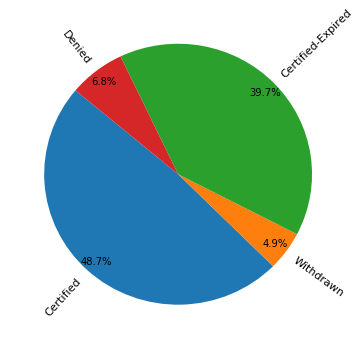

In [127]:
print ('% del estado de cada una de las aplicaciones para visa')
crearGrafico(y_train)

In [189]:
def buscarColumnasSinValores( data, porc ):
    i = 0;
    fila = 1;
    for col in data.columns:
        i = i+1;
        porcNulos = np.round(100 - 100*data[col].count()/len(data['case_status']),decimals=2);
        if porcNulos >= porc:            
            print("Columna ", fila, " : ", col , " tiene ", porcNulos, " % de valores nulos" );
            fila = fila + 1;

In [180]:
datos['add_these_pw_job_title_9089'].isnull().sum()


332168

In [182]:
len(datos['case_status'])

374362

In [181]:
datos2 = datos.loc[:,datos.count() >= 330000]
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 17 columns):
case_status               374362 non-null object
class_of_admission        351517 non-null object
country_of_citizenship    353729 non-null object
decision_date             374362 non-null object
employer_address_1        374320 non-null object
employer_city             374348 non-null object
employer_name             374350 non-null object
employer_postal_code      374325 non-null object
employer_state            374320 non-null object
job_info_work_city        374260 non-null object
job_info_work_state       374259 non-null object
pw_amount_9089            372146 non-null object
pw_level_9089             346735 non-null object
pw_soc_code               373965 non-null object
pw_soc_title              372026 non-null object
pw_source_name_9089       372263 non-null object
pw_unit_of_pay_9089       372790 non-null object
dtypes: object(17)
memory usage: 48.6+ MB


In [198]:
datos['country_of_citzenship'].isnull().sum()

353788

In [192]:
buscarColumnasSinValores( datos, 85 )
#datos['case_status'].isnull().sum()


Columna  1  :  add_these_pw_job_title_9089  tiene  88.73  % de valores nulos
Columna  2  :  country_of_citzenship  tiene  94.5  % de valores nulos
Columna  3  :  employer_phone_ext  tiene  93.73  % de valores nulos
Columna  4  :  foreign_worker_info_education_other  tiene  98.95  % de valores nulos
Columna  5  :  ji_live_in_dom_svc_contract  tiene  99.36  % de valores nulos
Columna  6  :  job_info_alt_combo_ed_other  tiene  97.54  % de valores nulos
Columna  7  :  job_info_education_other  tiene  97.92  % de valores nulos
Columna  8  :  job_info_training_field  tiene  98.8  % de valores nulos
Columna  9  :  job_info_training_num_months  tiene  98.72  % de valores nulos
Columna  10  :  naics_2007_us_code  tiene  94.52  % de valores nulos
Columna  11  :  naics_2007_us_title  tiene  94.68  % de valores nulos
Columna  12  :  orig_case_no  tiene  99.92  % de valores nulos
Columna  13  :  orig_file_date  tiene  99.92  % de valores nulos
Columna  14  :  pw_source_name_other_9089  tiene  95.79

In [133]:
columnasConNan.loc[:, columnasConNan.count() = 0] 

SyntaxError: invalid syntax (<ipython-input-133-739cecb0f70c>, line 1)

# Aplicacion de SVM

Número y tipo de características (binarias, discretas, continuas, etc.)